<a href="https://colab.research.google.com/github/kyungbinYoo/programming/blob/main/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, t_train), (x_test,t_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
t_test.shape

(10000,)

In [ ]:
t_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100)

plt.imshow(x_train[32],'gray')
print(x_train[32])
print(t_train[32])
plt.show()



In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
learn = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
input_layer = tf.keras.layers.InputLayer(input_shape=())

In [ ]:
learn.compile(optimizer = tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
learn.fit(x_train,t_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4864 - accuracy: 0.8262
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3625 - accuracy: 0.8680
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3282 - accuracy: 0.8786


In [ ]:
learn_ev = learn.evaluate(x_test,t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8690


In [ ]:
def normalize(x_train, x_test):
  x_train = x_train/255.0
  x_test = x_test/255.0

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout




In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, t_train), (x_test,t_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
from warnings import filters
cnn_learn = Sequential()

cnn_learn.add(Conv2D(input_shape=(28,28,1),kernel_size=(3,3),
               padding = 'valid',
               filters=32,activation='relu'))
cnn_learn.add(MaxPool2D(pool_size=(2,2)))

cnn_learn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               padding = 'valid',
               filters=64,activation='relu'))

cnn_learn.add(MaxPool2D(pool_size=(2,2)))
cnn_learn.add(Dropout(0.25))

cnn_learn.add(Flatten())

cnn_learn.add(Dense(128,activation='relu'))
cnn_learn.add(Dropout(0.5))
cnn_learn.add(Dense(10,activation='softmax'))

cnn_learn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [ ]:
cnn_learn.compile(optimizer = tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
hist= cnn_learn.fit(x_train,t_train,batch_size=512,epochs=10,validation_data=(x_test,t_test))

Epoch 1/10
118/118 [==============================] - 47s 396ms/step - loss: 0.8843 - accuracy: 0.6759 - val_loss: 0.5227 - val_accuracy: 0.8033
Epoch 2/10
118/118 [==============================] - 46s 392ms/step - loss: 0.5357 - accuracy: 0.8018 - val_loss: 0.4499 - val_accuracy: 0.8363
Epoch 3/10
118/118 [==============================] - 46s 392ms/step - loss: 0.4644 - accuracy: 0.8306 - val_loss: 0.4018 - val_accuracy: 0.8518
Epoch 4/10
118/118 [==============================] - 46s 390ms/step - loss: 0.4293 - accuracy: 0.8460 - val_loss: 0.3725 - val_accuracy: 0.8623
Epoch 5/10
118/118 [==============================] - 46s 390ms/step - loss: 0.3998 - accuracy: 0.8566 - val_loss: 0.3493 - val_accuracy: 0.8724
Epoch 6/10
118/118 [==============================] - 47s 401ms/step - loss: 0.3773 - accuracy: 0.8625 - val_loss: 0.3344 - val_accuracy: 0.8779
Epoch 7/10
118/118 [==============================] - 46s 392ms/step - loss: 0.3581 - accuracy: 0.8713 - val_loss: 0.3250 - val_ac

In [ ]:
cnn_learn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [ ]:
cnn_learn_loss = cnn_learn.evaluate(x_test,t_test)

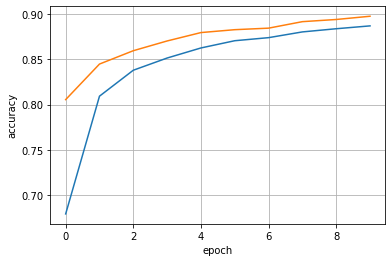

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [ ]:
image = x_train[0]

In [ ]:
image.shape

(28, 28)

In [ ]:
image = image[tf.newaxis,...,tf.newaxis]

In [ ]:
image.shape

(1, 28, 28, 1)

In [ ]:
tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3), strides=(1,1),padding='VALID',activation='relu')

In [ ]:
image = tf.cast(image,dtype=tf.float32)

In [ ]:
layer= tf.keras.layers.Conv2D(3,3,strides=(1,1),padding='SAME')
output= layer(image)

<function matplotlib.pyplot.show>

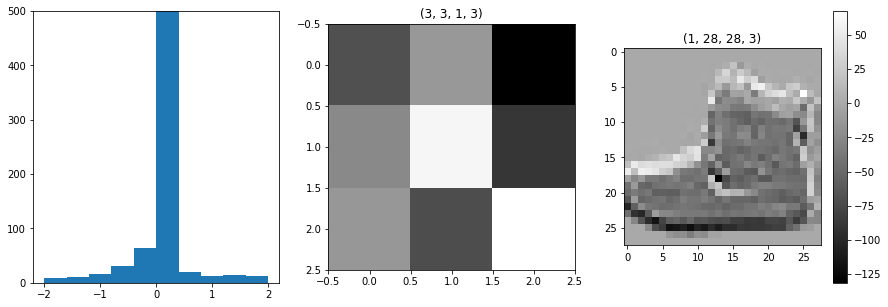

In [ ]:
weight = layer.get_weights()[0]

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(output.numpy().ravel(),range=[-2,2])
plt.ylim(0,500)
plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:,:,0,0],'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show

In [ ]:
layer=tf.keras.layers.ReLU()
output=layer(output)

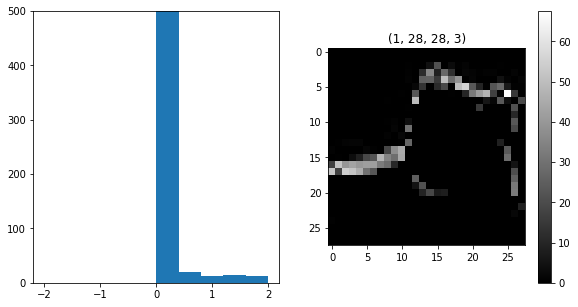

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(),range=[-2,2])
plt.ylim(0,500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

In [ ]:
tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME')
layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME')
output=layer(output)

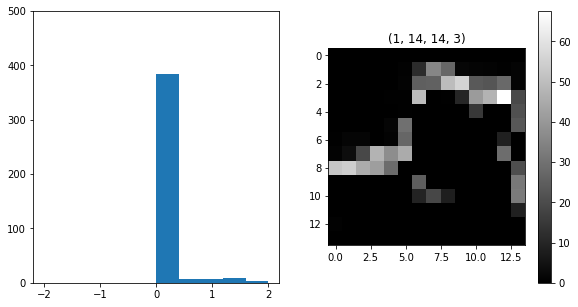

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(),range=[-2,2])
plt.ylim(0,500)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

In [ ]:
layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME')
output=layer(output)

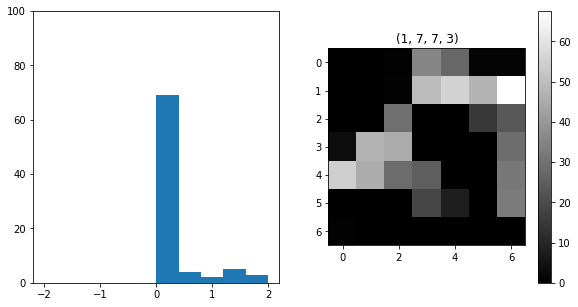

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

In [ ]:
tf.keras.layers.Flatten()

In [ ]:
layer=tf.keras.layers.Flatten()
output=layer(output)

<function matplotlib.pyplot.show>

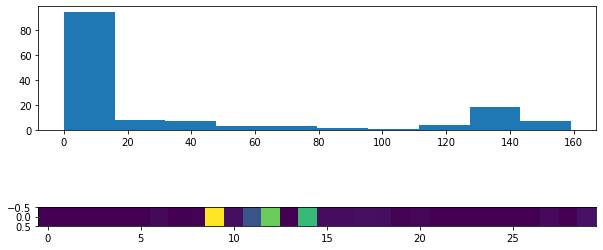

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:30])
plt.show

In [ ]:
tf.keras.layers.Dense(32,activation='relu')

In [ ]:
layer = tf.keras.layers.Dense(32,activation='relu')
output=layer(output)

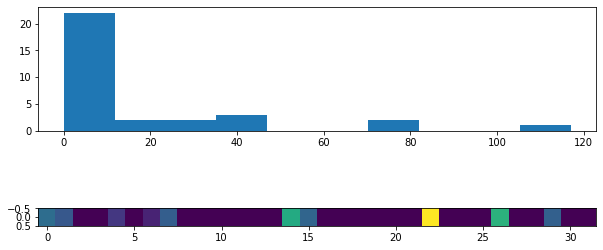

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

In [ ]:
layer=tf.keras.layers.Dropout(0.25)
output=layer(output)

<function matplotlib.pyplot.show>

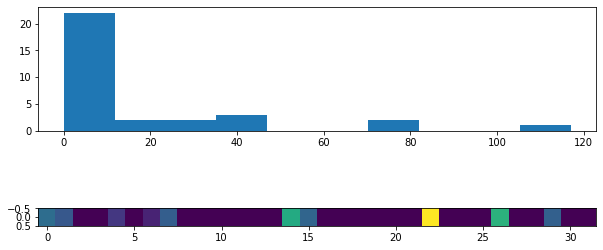

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show